# Exploratory Data Analysis - Palmer Penguins (LTER dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## initial visualization on data

In [2]:
df = pd.read_csv("penguins_lter.csv")

print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

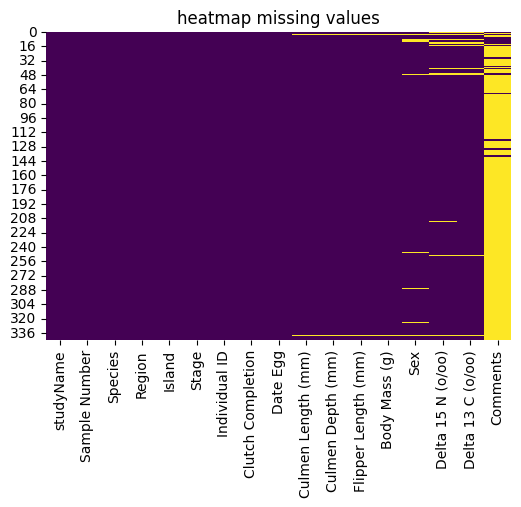

missing values per kolom:
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


In [3]:
#cek missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("heatmap missing values")
plt.show()

print("missing values per kolom:")
print(df.isna().sum())


In [4]:
#handle missing value

#drop unrelevant columns
df = df.drop(columns=["Sample Number"])
df = df.drop(columns=["Comments"])
df = df.drop(columns=["Stage"]) #isinya sama semua
df = df.drop(columns=["Region"]) #isinya sama semua
#df = df.drop(columns=["studyName"])
df = df.drop(columns=["Individual ID"])
df["Sex"] = df["Sex"].replace(".", np.nan) #ada outlier kecil

#drop baris yang ada missing di numeric variables utama
num_main = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
df = df.dropna(subset=num_main)

#drop rows yang kosong di column sex
df = df.dropna(subset=["Sex"])

#isi pake median
df["Delta 15 N (o/oo)"] = df.groupby("Species")["Delta 15 N (o/oo)"].transform(
    lambda x: x.fillna(x.median())
)
df["Delta 13 C (o/oo)"] = df.groupby("Species")["Delta 13 C (o/oo)"].transform(
    lambda x: x.fillna(x.median())
)

print("sisa missing values")
print(df.isna().sum())


sisa missing values
studyName              0
Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            333 non-null    object 
 1   Species              333 non-null    object 
 2   Island               333 non-null    object 
 3   Clutch Completion    333 non-null    object 
 4   Date Egg             333 non-null    object 
 5   Culmen Length (mm)   333 non-null    float64
 6   Culmen Depth (mm)    333 non-null    float64
 7   Flipper Length (mm)  333 non-null    float64
 8   Body Mass (g)        333 non-null    float64
 9   Sex                  333 non-null    object 
 10  Delta 15 N (o/oo)    333 non-null    float64
 11  Delta 13 C (o/oo)    333 non-null    float64
dtypes: float64(6), object(6)
memory usage: 33.8+ KB


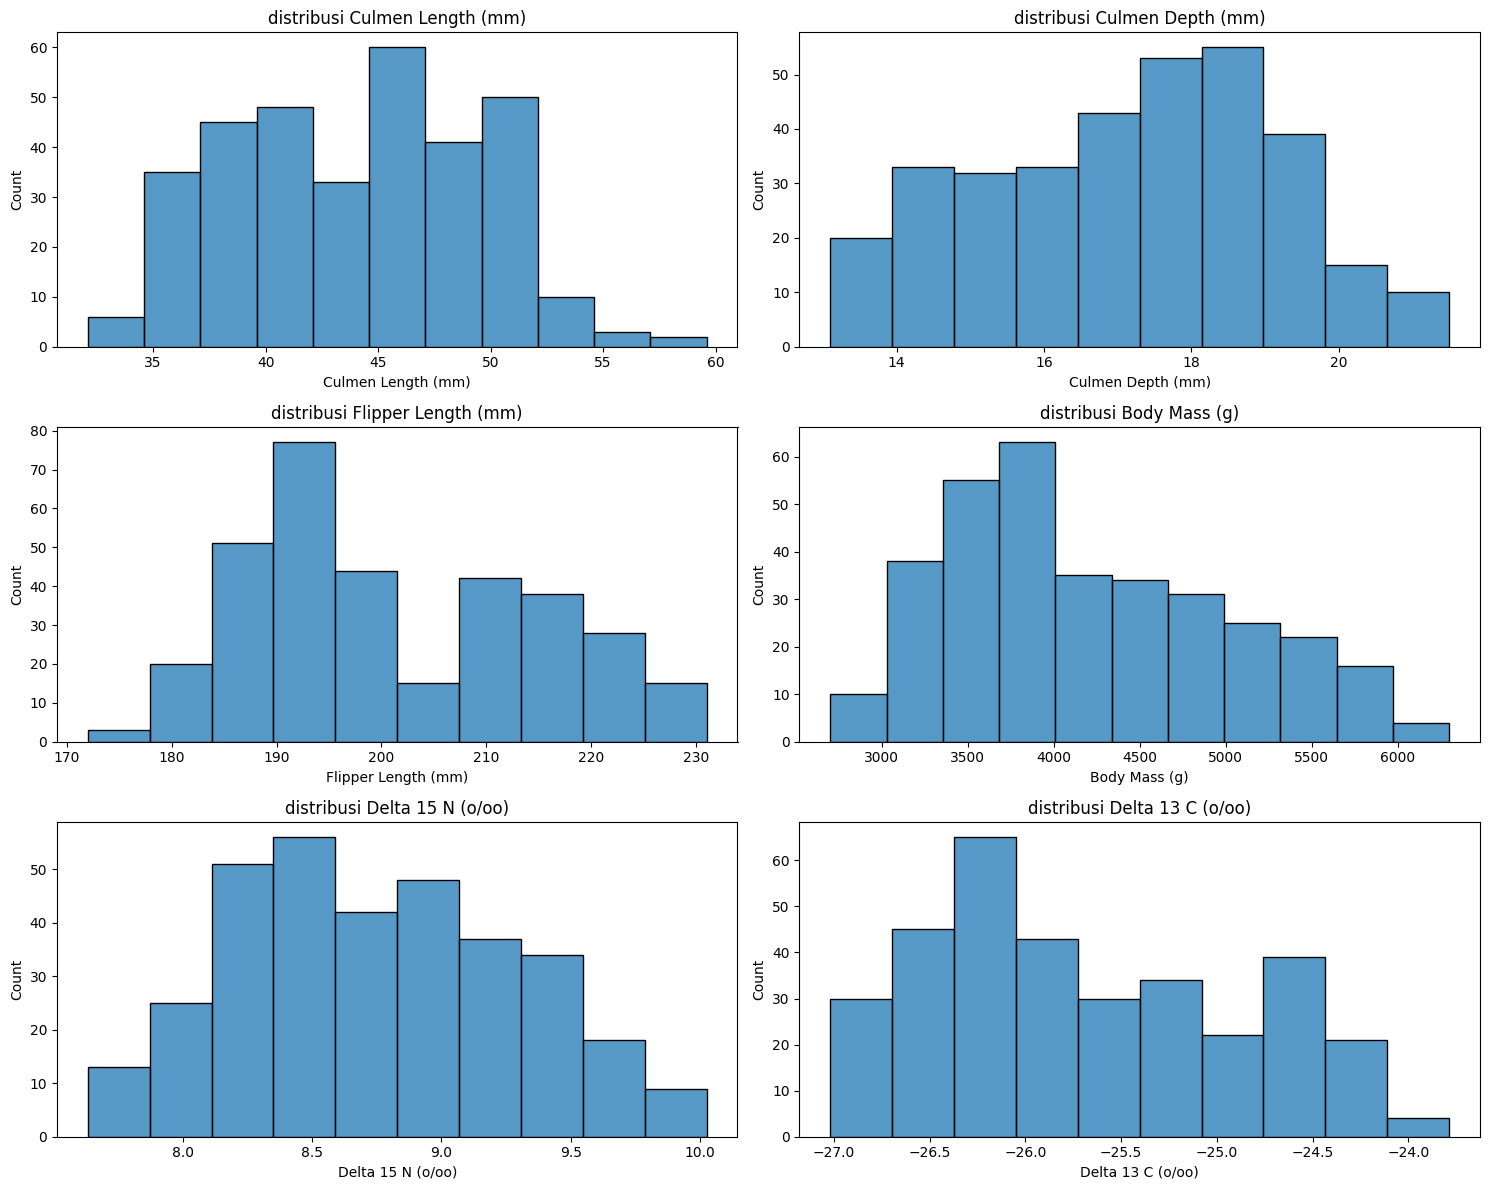

In [6]:
#numerik values
nc = df.select_dtypes(include=["float64", "int64"]).columns

#buat ukuran display
nrows, ncols = 3, 2  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(nc[:nrows * ncols]):  
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f"distribusi {col}")

plt.tight_layout()
plt.show()

morfologi (culmen, flipper, body mass) penguin relatif terdistribusi normal dengan beberapa variasi antar spesies, sedangkan isotop stabil menunjukkan adanya perbedaan pola makan dan habitat.

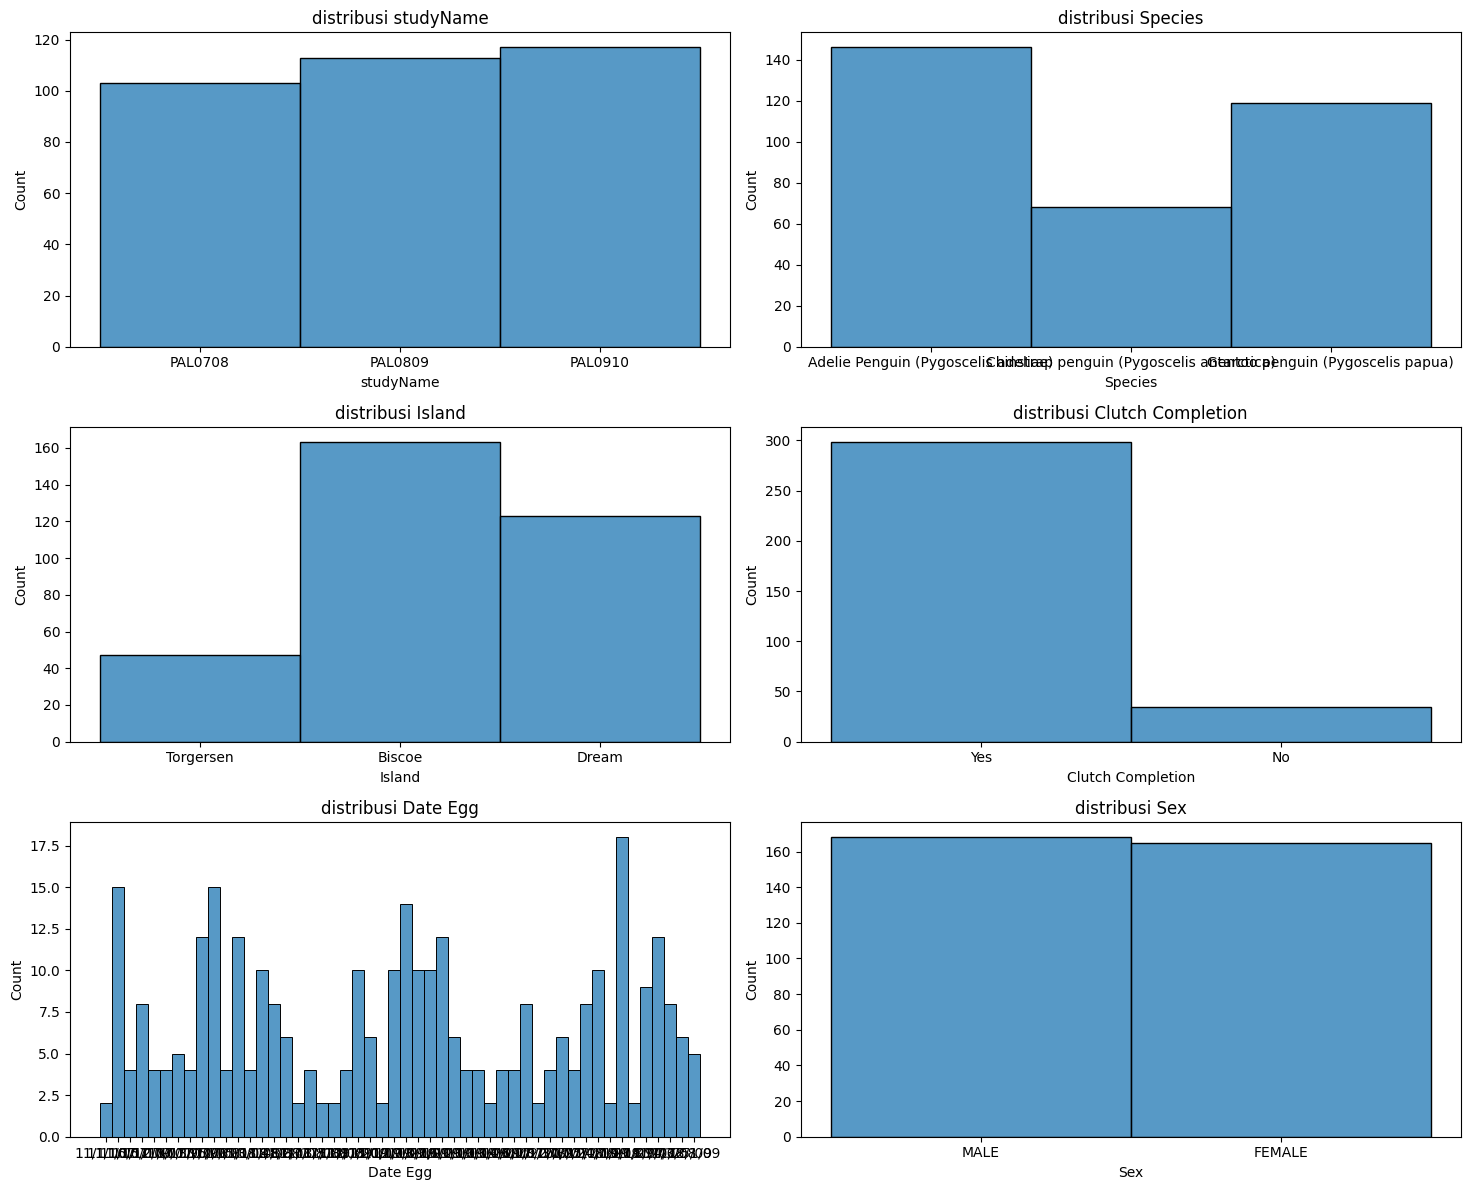

In [7]:
#categorical values
nc = df.select_dtypes(include=["object"]).columns

#buat ukuran display
nrows, ncols = 3, 2  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(nc[:nrows * ncols]):  
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f"distribusi {col}")

plt.tight_layout()
plt.show()

## preprocess

In [8]:
#ngubah yg 'object' biar data bisa diproses

df['Date Egg'] = pd.to_datetime(df['Date Egg'], errors='coerce') #date egg pake time table mngkin?
le = LabelEncoder()
df['studyName'] = le.fit_transform(df['studyName'])
df['Species'] = le.fit_transform(df['Species'])
df['Island'] = le.fit_transform(df['Island'])
df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])
df['Sex'] = le.fit_transform(df['Sex'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            333 non-null    int64         
 1   Species              333 non-null    int64         
 2   Island               333 non-null    int64         
 3   Clutch Completion    333 non-null    int64         
 4   Date Egg             333 non-null    datetime64[ns]
 5   Culmen Length (mm)   333 non-null    float64       
 6   Culmen Depth (mm)    333 non-null    float64       
 7   Flipper Length (mm)  333 non-null    float64       
 8   Body Mass (g)        333 non-null    float64       
 9   Sex                  333 non-null    int64         
 10  Delta 15 N (o/oo)    333 non-null    float64       
 11  Delta 13 C (o/oo)    333 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 33.8 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_8612\1674131864.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Egg'] = pd.to_datetime(df['Date Egg'], errors='coerce') #date egg pake time table mngkin?


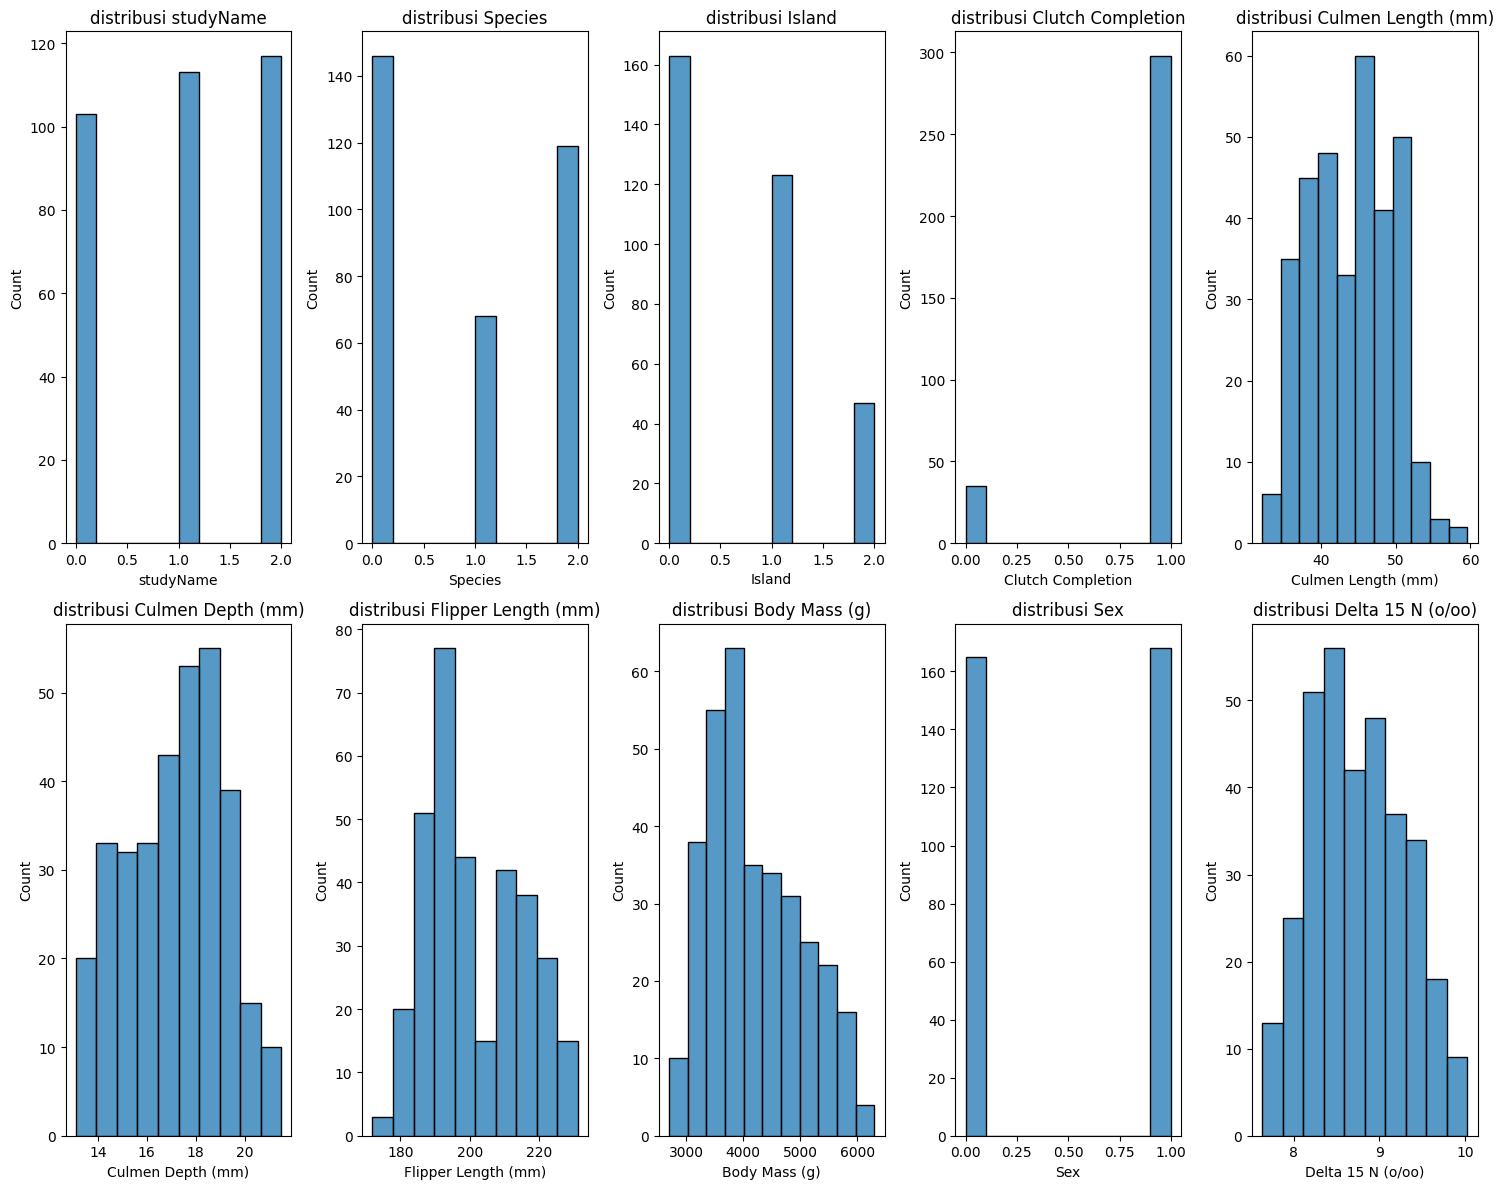

In [9]:
numCols = df.select_dtypes(include=["int64", "float64"]).columns

#buat ukuran display
nrows, ncols = 2, 5  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numCols[:nrows * ncols]):  
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f"distribusi {col}")

plt.tight_layout()
plt.show()


karena dilabel encoder, valuenya jadi numeric smua
kenapa -> model gabisa process dtype 'object'

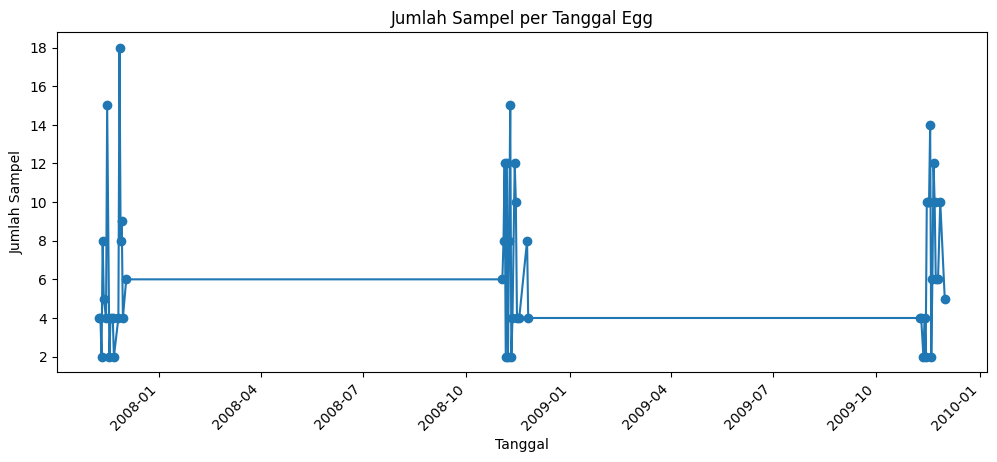

In [10]:
#date egg table
plt.figure(figsize=(12,5))
df["Date Egg"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Jumlah Sampel per Tanggal Egg")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Sampel")
plt.xticks(rotation=45)
plt.show()

grafik menunjukkan bahwa jumlah sampel penguin berfluktuasi mengikuti musim bertelur. Lonjakan jumlah sampel terjadi pada periode tertentu setiap tahun, sedangkan di luar musim jumlahnya relatif rendah. Hal ini menegaskan bahwa pengambilan data terutama difokuskan saat musim reproduksi penguin.

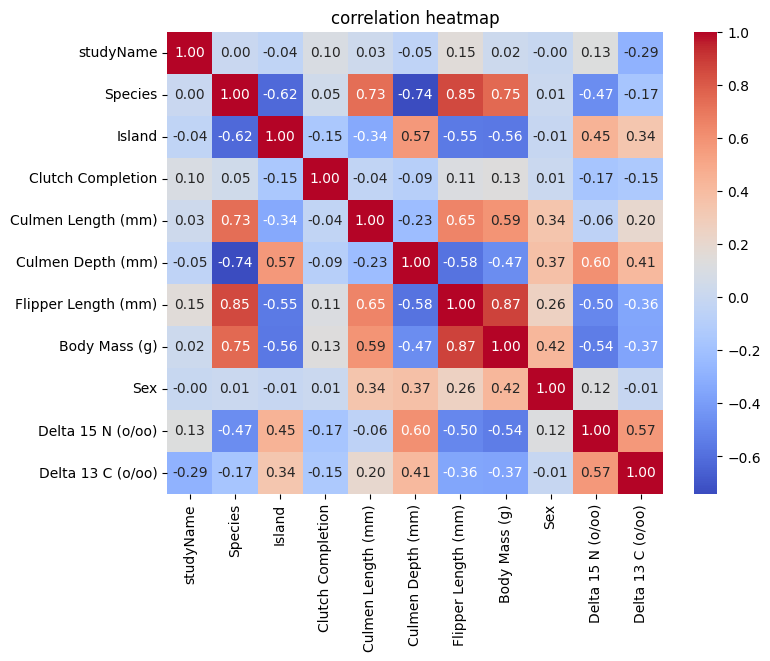

In [11]:
#heatmap antar variabel numerik
plt.figure(figsize=(8,6))
corr = df[numCols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()

## numeric values correlation summ
    - Flipper length dan body mass memiliki korelasi sangat kuat (0.87), artinya semakin panjang flipper, semakin besar massa tubuh
    - Culmen length juga berkorelasi cukup kuat dengan flipper length (0.65 ) dan body mass (0.59)
    - Culmen depth memiliki pola berbeda, berkorelasi negatif dengan flipper length (-0.58) dan body mass (-0.47)
    - Tidak ada korelasi ekstrem yng mendekati 1.0 atau -1.0 selain flipper–body mass, sehingga risiko multikolinearitas parah relatif rendah

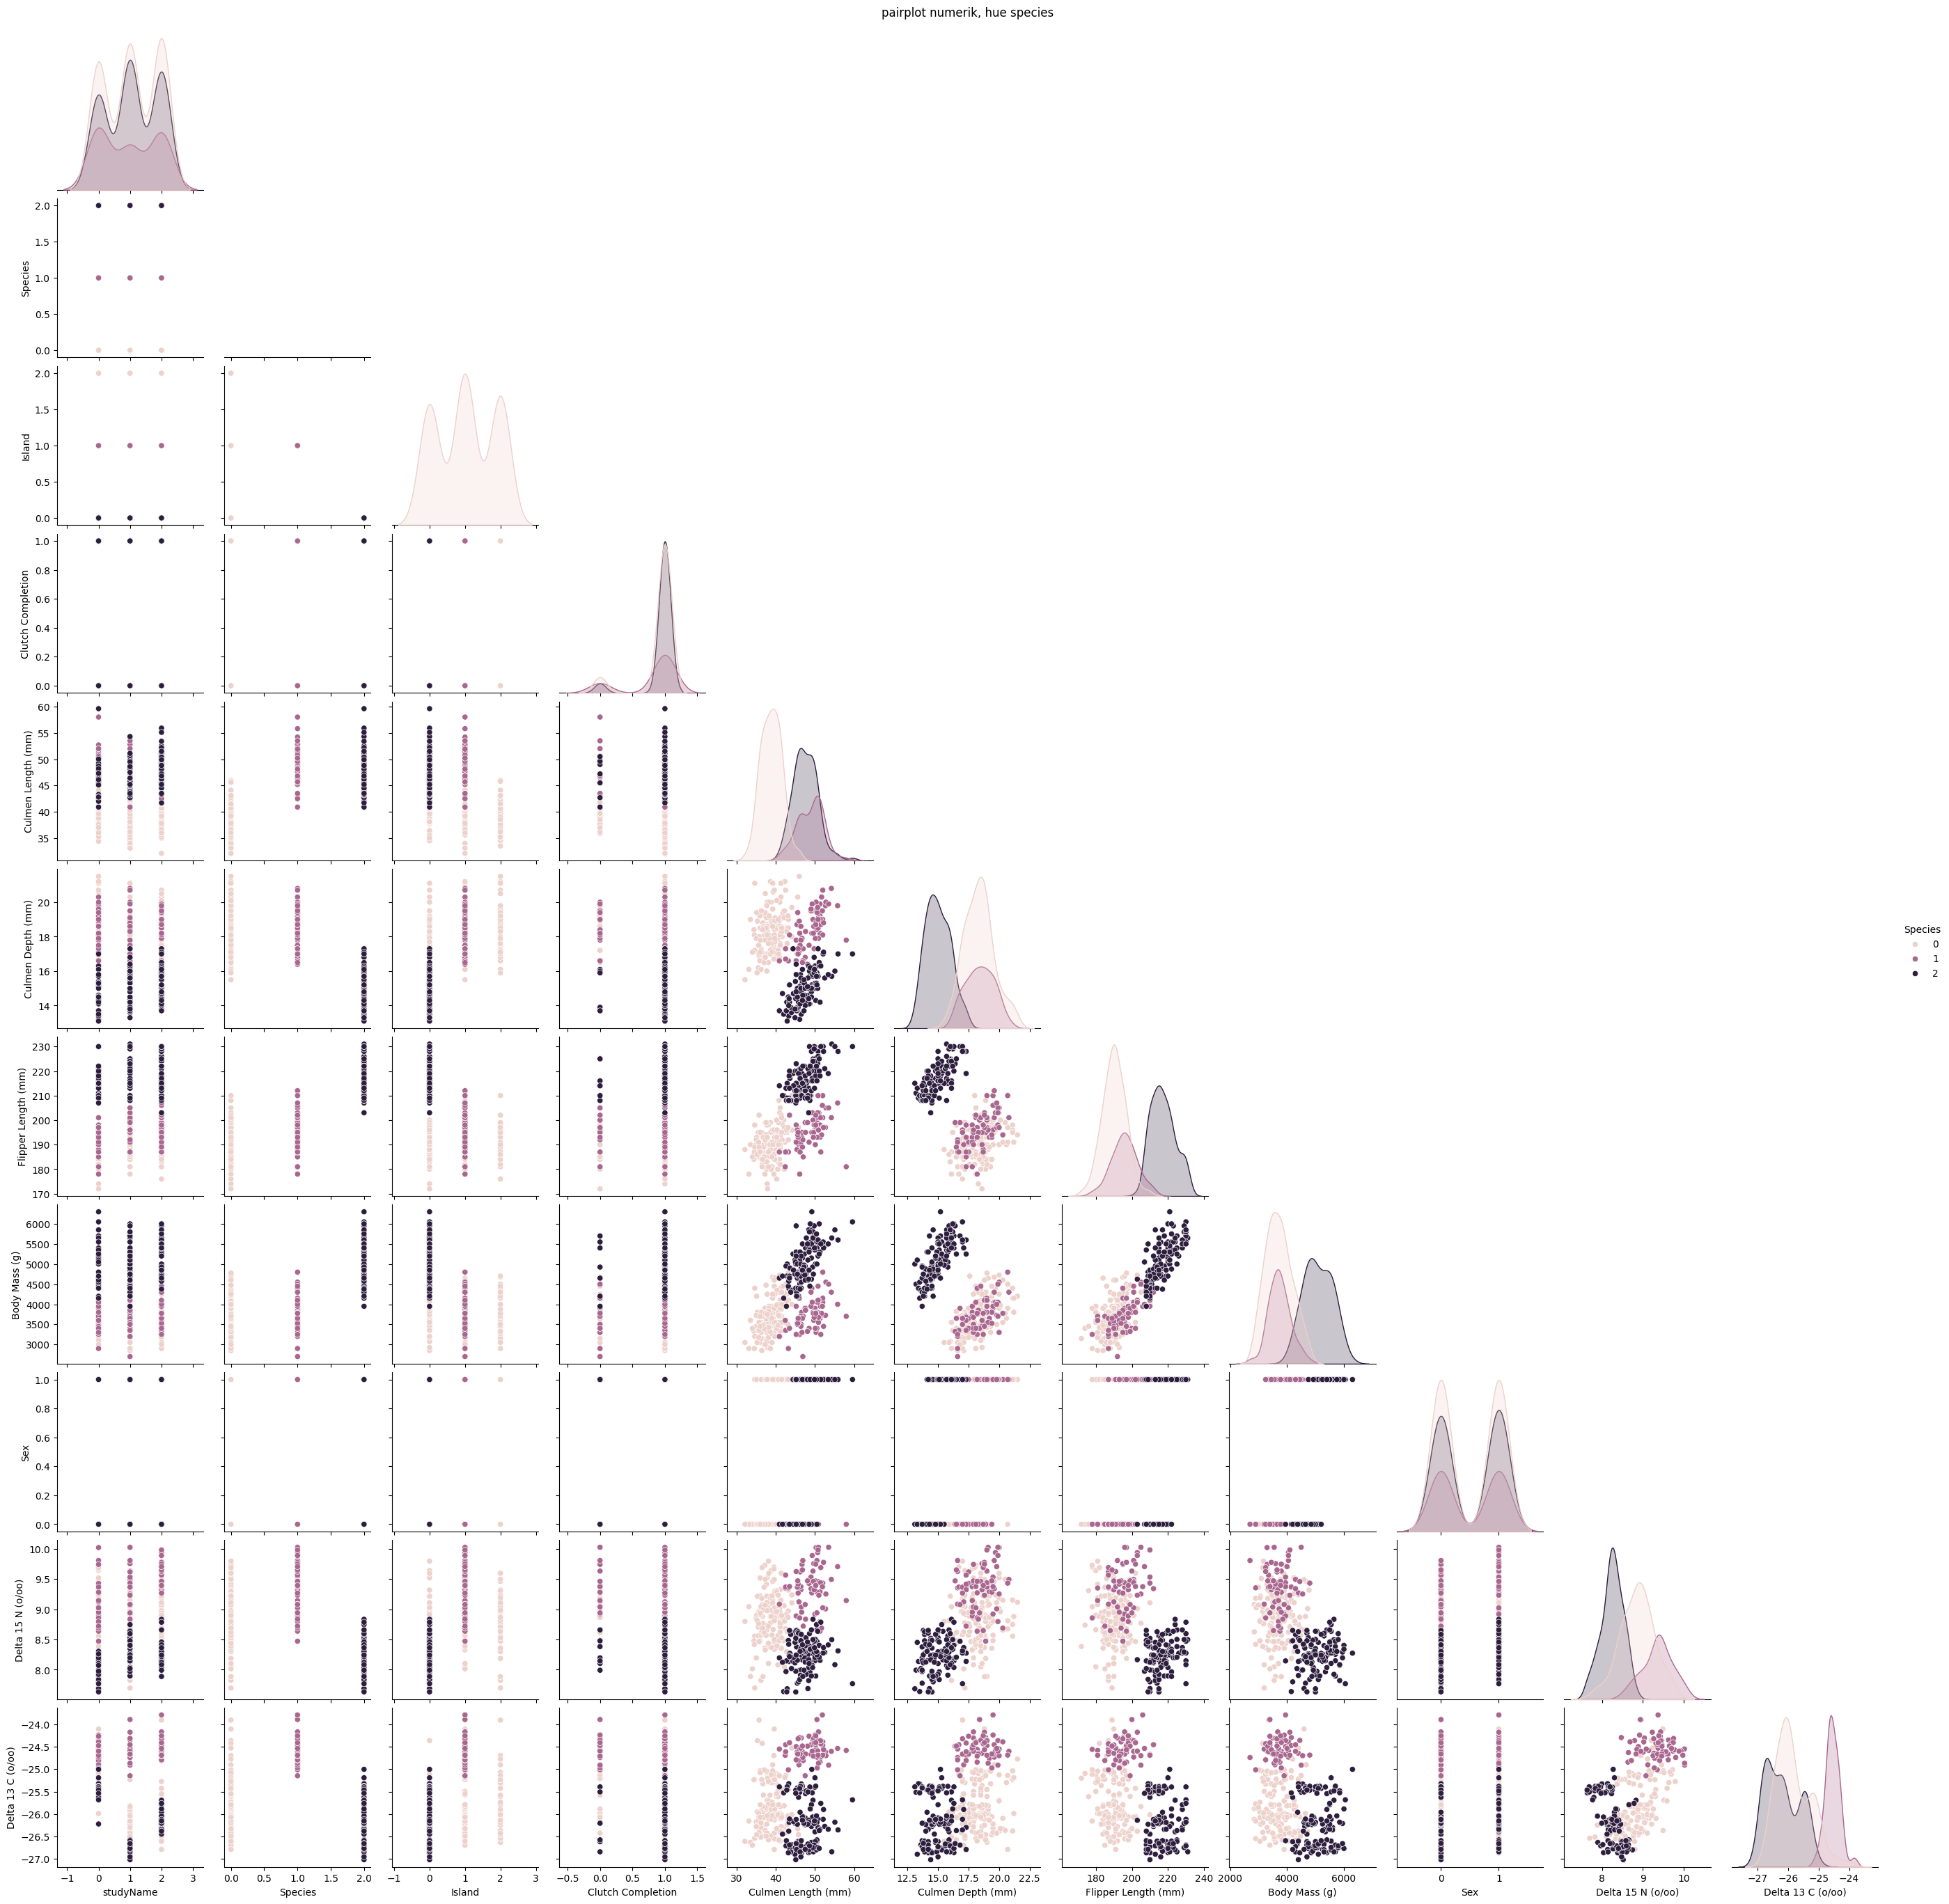

In [12]:
#pairplot
sns.pairplot(df, vars=numCols, hue="Species", diag_kind="kde", corner=True)
plt.suptitle("pairplot numerik, hue species", y=1)
plt.show()


In [13]:
df.to_csv('cleanedData.csv', index=False)